# 1st Integrated Project

### Table of Contents

* [Preface](#Preface) 
 
 <p/>  
 
* [Step 1. General information](#Step-1.-General-information) 

<p/>   

* [Step 2. Data preprocessing](#Step-2.-Data-preprocessing)         
        
    * [2.1 Lowercasing and shortening column names](#2.1-Lowercasing-and-shortening-column-names)
    
    * [2.2 Missing values, duplicates, errors](#2.2-Missing-values,-duplicates,-errors)
    
        * [2.2.2 Conclusion](#2.2.2-Conclusion)
    
    * [2.4 Data types](#2.4-Data-types)


<p/>      

* [Step 3. Analyzing the data](#Step-3.-Analyze-the-data)
       
    * [3.1 Releases per year](#3.1-Releases-per-year)
       
    * [3.2 Platforms sales and lifespans](#3.2-Platforms-sales-and-lifespans)
    
    * [3.3 Determine what period you should take data for](#3.3-Determine-what-period-you-should-take-data-for)
    
    * [3.4 Leading platforms](#3.4-Leading-platforms)
    
    * [3.5 Sales by platforms](#3.5-Sales-by-platforms)

    * [3.6 Reviews](#3.6-Reviews)
    
    * [3.7 Sales comparison for games across platforms](#3.7-Sales-comparison-for-games-across-platforms)
       
    * [3.8 Genres profitability](#3.8-Genres-profitability)
    
    
<p/>    

* [Step 4. Create a user profile for each region](#Step-4.-Create-a-user-profile-for-each-region)

    * [4.1 The top five platforms](#4.1-The-top-five-platforms)
       
    * [4.2 The top five genres](#4.2-The-top-five-genres)
    
    * [4.3 ESRB ratings](#4.3-ESRB-ratings)

       
<p/> 

* [Step 5. Hypotheses testing](#Step-5.-Hypotheses-testing)

    * [5.1 Average user ratings of the Xbox One and PC platforms are the same](#5.1-Average-user-ratings-of-the-Xbox-One-and-PC-platforms-are-the-same)
       
    * [5.2 Average user ratings for the Action and Sports genres are different](#5.2-Average-user-ratings-for-the-Action-and-Sports-genres-are-different)
    
    * [5.3 Conclusion](#5.3-Conclusion)
       

<p/> 

* [Step 6. General conclusion](#Step-6.-General-conclusion)

### Preface

This market research is made for the Ice online store selling video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. The goal is to identify patterns that determine whether a game succeeds or not. This will allow to spot potential big winners and plan advertising campaigns.

The given dataset comprises video games sales information for the period between 1980 and 2016. Task presumes it is December 2016 now and we’re planning a campaign for 2017.

Video games market is large but with a relatively short history beginning somewhere around 1970s. There are numerous platforms available for running games, so our dataset contains platform category.  

According to Newzoo Global Games Market Report from April 2016, gamers worldwide will generate a total of USD 99.6 billion in revenues in 2016, up 8.5% compared to 2015. For the first time, mobile gaming will take a larger share than PC with USD 36.9 billion, up 21.3% globally. APAC continues to dominate worldwide, accounting for 47% of the market. China alone accounts for one-quarter of all global game revenues. Newzoo expects the global market to grow at a CAGR of +6.6% toward 2019, eventually reaching USD 118.6 billion with mobile gaming at USD 52.5 billion.

### Step 1. General information

In [1]:
!pip3 install missingno

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as mn
import plotly.express as px

In [3]:
try:
    games = pd.read_csv(r"C:\Data\games.csv") 
    
except:
    games = pd.read_csv('/datasets/games.csv')

In [4]:
games.tail()

Name Platform  Year_of_Release       Genre  \
16710  Samurai Warriors: Sanada Maru      PS3           2016.0      Action   
16711               LMA Manager 2007     X360           2006.0      Sports   
16712        Haitaka no Psychedelica      PSV           2016.0   Adventure   
16713               Spirits & Spells      GBA           2003.0    Platform   
16714            Winning Post 8 2016      PSV           2016.0  Simulation   

       NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score  \
16710      0.00      0.00      0.01          0.0           NaN        NaN   
16711      0.00      0.01      0.00          0.0           NaN        NaN   
16712      0.00      0.00      0.01          0.0           NaN        NaN   
16713      0.01      0.00      0.00          0.0           NaN        NaN   
16714      0.00      0.00      0.01          0.0           NaN        NaN   

      Rating  
16710    NaN  
16711    NaN  
16712    NaN  
16713    NaN  
16714    NaN

NaNs

In [5]:
games.describe()

Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604      0.503339      0.308853   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        Other_sales  Critic_Score  
count  16715.000000   8137.000000  
mean       0.047342     68.967679  
std        0.186731     13.938165  
min        0.000000     13.000000  
25%        0.000000     60.000000  
50%        0.010000     71.000000  
75%        0.030000     79.000000  
max       10.570000     98.000000

1980-2016, Most of the market history here, though it actually was born in 70's. Here I see sales in USD million. 

In [6]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


A lot of missing values. User score won't work out as 'object'. 

### Step 2. Data preprocessing

###### 2.1 Lowercasing and shortening column names

In [7]:
games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [8]:
games.columns = ['name', 'platform', 'year', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'oth_sales', 'critic_scr', 'user_scr', 'rating']


In [9]:
games.columns

Index(['name', 'platform', 'year', 'genre', 'na_sales', 'eu_sales', 'jp_sales',
       'oth_sales', 'critic_scr', 'user_scr', 'rating'],
      dtype='object')

Done

###### 2.2 Missing values, duplicates, errors

In [10]:
games['name'].value_counts()

Need for Speed: Most Wanted                                12
Ratatouille                                                 9
FIFA 14                                                     9
Madden NFL 07                                               9
LEGO Marvel Super Heroes                                    9
                                                           ..
Ro-Kyu-Bu! Lost Secret                                      1
Theresia...                                                 1
Back At The Barnyard: Slop Bucket Games                     1
LittleBigPlanet Karting                                     1
Dora the Explorer: The Search for Pirate Pig's Treasure     1
Name: name, Length: 11559, dtype: int64

In [11]:
games.query('name == "Need for Speed: Most Wanted"')

name platform    year   genre  na_sales  \
253    Need for Speed: Most Wanted      PS2  2005.0  Racing      2.03   
523    Need for Speed: Most Wanted      PS3  2012.0  Racing      0.71   
1190   Need for Speed: Most Wanted     X360  2012.0  Racing      0.62   
1591   Need for Speed: Most Wanted     X360  2005.0  Racing      1.00   
1998   Need for Speed: Most Wanted       XB  2005.0  Racing      0.53   
2048   Need for Speed: Most Wanted      PSV  2012.0  Racing      0.33   
3581   Need for Speed: Most Wanted       GC  2005.0  Racing      0.43   
5972   Need for Speed: Most Wanted       PC  2005.0  Racing      0.02   
6273   Need for Speed: Most Wanted     WiiU  2013.0  Racing      0.13   
6410   Need for Speed: Most Wanted       DS  2005.0  Racing      0.24   
6473   Need for Speed: Most Wanted      GBA  2005.0  Racing      0.19   
11715  Need for Speed: Most Wanted       PC  2012.0  Racing      0.00   

       eu_sales  jp_sales  oth_sales  critic_scr user_scr rating  
253        1.79      0.08       0.47        82.0      9.1      T  
523        1.46      0.06       0.58         NaN      NaN    NaN  
1190       0.78      0.01       0.15        83.0      8.5      T  
1591       0.13      0.02       0.10        83.0      8.5      T  
1998       0.46      0.00       0.05        83.0      8.8      T  
2048       0.45      0.01       0.22         NaN      NaN    NaN  
3581       0.11      0.00       0.02        80.0      9.1      T  
5972       0.23      0.00       0.04        82.0      8.5      T  
6273       0.12      0.00       0.02         NaN      NaN    NaN  
6410       0.01      0.00       0.02        45.0      6.1      E  
6473       0.07      0.00       0.00         NaN      8.3      E  
11715      0.06      0.00       0.02        82.0      8.5      T

OK, that's not duplicates, different years and platforms and other values all differ.

In [12]:
len(games[games.duplicated() == True])

0

No duplicated rows. Great. How about lowercased version?

In [13]:
games_copy1 = games.copy().apply(lambda x: x.astype(str).str.lower())
games_copy1.sample(10)

name platform    year  \
1455                     tom clancy's rainbow six: siege     xone  2015.0   
14707          superdimension neptune vs sega hard girls      psv  2016.0   
2820          star wars episode iii: revenge of the sith      gba  2005.0   
7474                                 you don't know jack     x360  2011.0   
6896                             shadow hearts: covenant      ps2  2004.0   
10954                                            i-ninja       gc  2003.0   
6075                                           nascar 08     x360  2007.0   
13278                         tna impact: cross the line       ds  2010.0   
7646                                        nfl street 2       gc  2004.0   
1524   pirates of the caribbean: the curse of the bla...      gba  2003.0   

              genre na_sales eu_sales jp_sales oth_sales critic_scr user_scr  \
1455        shooter     0.77     0.45      0.0      0.12       74.0      6.9   
14707  role-playing      0.0     0.02      0.0      0.01       73.0      8.4   
2820         action     0.52     0.19      0.0      0.01       73.0      7.5   
7474           misc     0.19      0.0      0.0      0.01       82.0      7.9   
6896   role-playing     0.12     0.09      0.0      0.03       85.0      9.1   
10954      platform     0.07     0.02      0.0       0.0       77.0      7.6   
6075         racing     0.26      0.0      0.0      0.02       59.0      5.2   
13278      fighting     0.04      0.0      0.0       0.0        nan      tbd   
7646         sports     0.15     0.04      0.0      0.01       77.0      tbd   
1524       platform     0.93     0.34      0.0      0.02       49.0      6.2   

      rating  
1455       m  
14707      t  
2820    e10+  
7474       t  
6896       t  
10954      t  
6075       e  
13278      t  
7646       e  
1524       e

In [14]:
len(games_copy1[games_copy1.duplicated() == True])

0

Perfect, no case-sensitive duplications. 

In [15]:
games['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

OK

In [16]:
games['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

If PS, PS2, PS3, PS4 regarded as a separate platforms, which is fair and reasonable, why are 1995th i486 CPU computer and 2015th core i7 6th gen PC regarded as one similar PC platform? 
I mean barely there is more in common between them technically than between PS generations. 
Difference is that PLay Stations were marketed as a separate platforms of different generations, whilst PCs had a very different market presentation, not to mention they were not even designed to be a gaming platform solemnly.   

In [17]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [18]:
np.sort(games['year'].unique())

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

Legit values, all OK

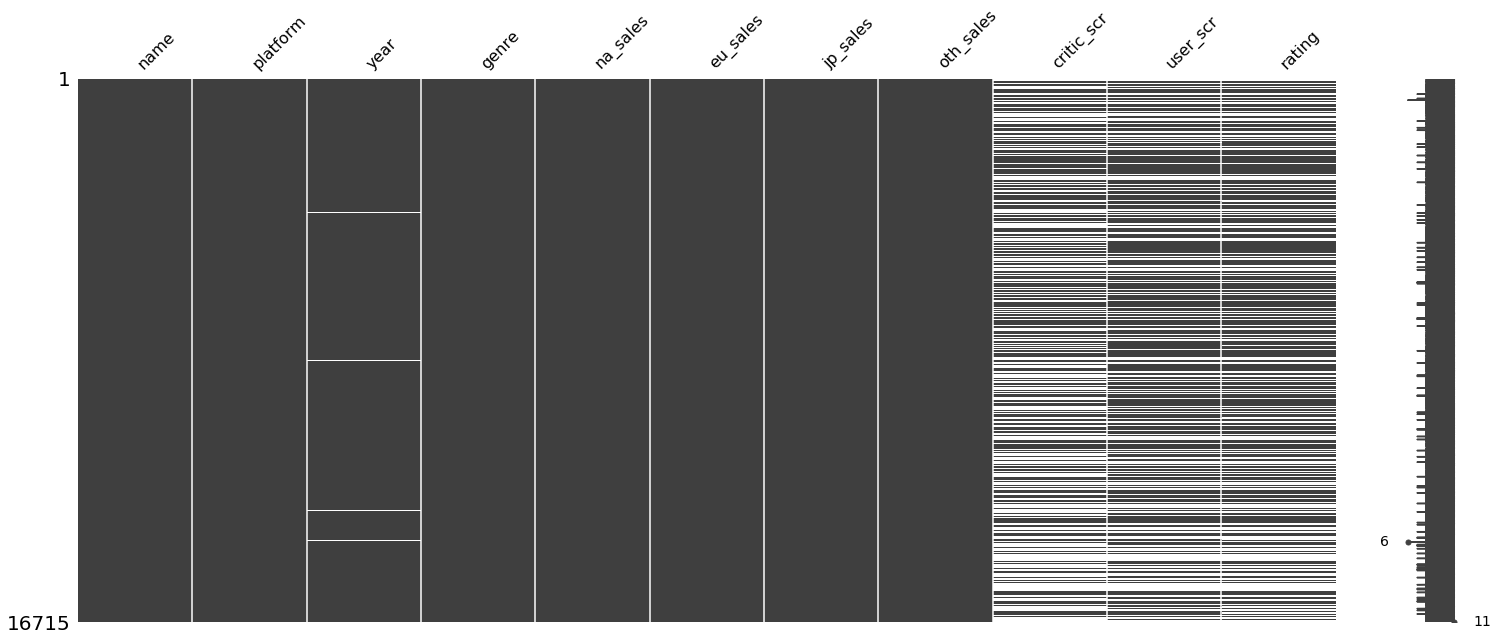

In [19]:
mn.matrix(games);

Here we see some missing values. Release years can be easily found and replaced. Scores and rating, I don't think would be that simple to replace, dealing with it below. 

In [20]:
nulls_prc = pd.DataFrame((games.isnull().sum())*100/games.shape[0]).reset_index()
nulls_prc.columns = ['Column Name', 'Null Values Percent']
nulls_num = pd.DataFrame(games.isnull().sum()).reset_index()
nulls_num.columns = ['Column Name', 'Null Values']
nulls = pd.merge(nulls_num, nulls_prc, on='Column Name')
nulls

Column Name  Null Values  Null Values Percent
0         name            2             0.011965
1     platform            0             0.000000
2         year          269             1.609333
3        genre            2             0.011965
4     na_sales            0             0.000000
5     eu_sales            0             0.000000
6     jp_sales            0             0.000000
7    oth_sales            0             0.000000
8   critic_scr         8578            51.319174
9     user_scr         6701            40.089740
10      rating         6766            40.478612

Massive nulls percentage in rating and scores. 

In [21]:
games[games['name'].isnull() == True]

name platform    year genre  na_sales  eu_sales  jp_sales  oth_sales  \
659    NaN      GEN  1993.0   NaN      1.78      0.53      0.00       0.08   
14244  NaN      GEN  1993.0   NaN      0.00      0.00      0.03       0.00   

       critic_scr user_scr rating  
659           NaN      NaN    NaN  
14244         NaN      NaN    NaN

This can be safely removed. Some values got lost. Maybe in an initial sources or while processing the data.

In [22]:
games = games.drop(games[games['name'].isnull() == True].index)
len(games[games['name'].isnull() == True])

0

In [23]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [24]:
games['user_scr'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

'tbd', now I see it. will get back to it below.

In [25]:
games['critic_scr'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [26]:
games.query('user_scr == "0"')

name platform    year      genre  \
2835  My Little Pony: Pinkie Pie's Party       DS  2008.0  Adventure   

      na_sales  eu_sales  jp_sales  oth_sales  critic_scr user_scr rating  
2835      0.66       0.0       0.0       0.06         NaN        0      E

Is Little Pony actually that bad?
Metacritics suggests it's really a terrible game, only negative reviews. So let's assume 0 is just the lowest rating possible and leave it as is.
https://www.metacritic.com/game/ds/my-little-pony-pinkie-pies-party 

In [27]:
len(games[games['year'].isnull() == True])

269

In [28]:
from IPython.display import display, HTML
display(HTML(games[games['year'].isnull() == True].to_html()))

269 rows isn't too much, I want to inspect it all visually

Actually, the right solution here is to leave missing values untreated, because restoration will take sufficient time. 

Possible solution is to write a parser, to get release years, and rating scores from openly available sources. 
But I'm unable to write a parser at the moment, though I understand it's pretty simple. I mean I can do it, but it would take quite some time, and I don't have time. 

I could even fill Year column by hand in less than an hour, but still it would be too much of an effort, since presence of missing values won't affect my further conclusions here. So, I'm leaving scores and rating columns untreated, and will just slice out missings locally when needed. 

Imputing scores with average sounds crazy, why would I, and I can just pick any required part of the set whenever I have to. 

Several games have years in their names, but quick search showed this is not always same value as an actual release date.

Year value is missing due to some databases mismenagement, or due to parsing errors, or maybe data sources were incomplete. Ratings and scores could be only assigned to some part of data at some specific data source. But if you will look through internet, you will definitely find reviews and scorings for all or almost all games ever released. 

I thought for a minuites, that release year is similar across platforms. But no, just sometimes.

In [29]:
games[games['name'].str.contains('Hitman 2: Silent Assassin')]

name platform    year   genre  na_sales  eu_sales  \
483   Hitman 2: Silent Assassin      PS2  2002.0  Action      1.36      1.15   
1699  Hitman 2: Silent Assassin       XB     NaN  Action      0.76      0.38   
9493  Hitman 2: Silent Assassin       GC  2003.0  Action      0.10      0.03   

      jp_sales  oth_sales  critic_scr user_scr rating  
483       0.04       0.41        85.0      7.8      M  
1699      0.00       0.05        84.0        8      M  
9493      0.00       0.00        83.0      5.5      M

In [30]:
games[games['name'].str.contains('Half-Minute Hero 2')]

name platform  year         genre  na_sales  eu_sales  \
14105  Half-Minute Hero 2      PSP   NaN  Role-Playing       0.0       0.0   

       jp_sales  oth_sales  critic_scr user_scr rating  
14105      0.04        0.0         NaN      NaN    NaN

In [31]:
games.query('name == "Space Invaders"')

name platform    year    genre  na_sales  eu_sales  jp_sales  \
609    Space Invaders     2600     NaN  Shooter      2.36      0.14      0.00   
4264   Space Invaders     SNES  1994.0  Shooter      0.00      0.00      0.46   
8580   Space Invaders      N64  1999.0  Shooter      0.13      0.03      0.00   
10383  Space Invaders      GBA  2002.0  Shooter      0.08      0.03      0.00   

       oth_sales  critic_scr user_scr rating  
609         0.03         NaN      NaN    NaN  
4264        0.00         NaN      NaN    NaN  
8580        0.00         NaN      NaN    NaN  
10383       0.00         NaN      NaN    NaN

So this is not a reliable way to impute year values.

I once regreted going for approach to use some unrealistic value as a missings marker. But I don't feel like I want to impute or parse missing values here, and would rather mark them with some specific value to cut of when needed. 

Rating is categorical, so I'm keeping it as is. 

In [32]:
games['year'] = games['year'].fillna(-999)

In [33]:
len(games.query('year == -999'))

269

OK

Task states: "Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases."

In [34]:
len(games.query('name == "TBD" | platform == "TBD" | year == "TBD" | genre == "TBD" | rating == "TBD" | na_sales == "TBD" | eu_sales == "TBD" | jp_sales == "TBD" | oth_sales == "TBD" | critic_scr == "TBD" | user_scr == "TBD" | rating == "TBD"'))

0

But I don't have any TBD abbreviations here

Oh, it's lowercase, unlike in the task, I already saw it when listed the column uniques 

In [35]:
len(games.query('name == "tbd" | platform == "tbd" | year == "tbd" | genre == "tbd" | rating == "tbd" | na_sales == "tbd" | eu_sales == "tbd" | jp_sales == "tbd" | oth_sales == "tbd" | critic_scr == "tbd" | user_scr == "tbd" | rating == "tbd"'))

2424

There are a lot. Let's see.

In [36]:
games.query('user_scr == "tbd"')

name platform    year       genre  \
119                               Zumba Fitness      Wii  2010.0      Sports   
301              Namco Museum: 50th Anniversary      PS2  2005.0        Misc   
520                             Zumba Fitness 2      Wii  2011.0      Sports   
645                                uDraw Studio      Wii  2010.0        Misc   
657    Frogger's Adventures: Temple of the Frog      GBA  -999.0   Adventure   
...                                         ...      ...     ...         ...   
16695                           Planet Monsters      GBA  2001.0      Action   
16697                          Bust-A-Move 3000       GC  2003.0      Puzzle   
16698                          Mega Brain Boost       DS  2008.0      Puzzle   
16704                                  Plushees       DS  2008.0  Simulation   
16706             Men in Black II: Alien Escape       GC  2003.0     Shooter   

       na_sales  eu_sales  jp_sales  oth_sales  critic_scr user_scr rating  
119        3.45      2.59       0.0       0.66         NaN      tbd      E  
301        2.08      1.35       0.0       0.54        61.0      tbd   E10+  
520        1.51      1.03       0.0       0.27         NaN      tbd      T  
645        1.65      0.57       0.0       0.20        71.0      tbd      E  
657        2.15      0.18       0.0       0.07        73.0      tbd      E  
...         ...       ...       ...        ...         ...      ...    ...  
16695      0.01      0.00       0.0       0.00        67.0      tbd      E  
16697      0.01      0.00       0.0       0.00        53.0      tbd      E  
16698      0.01      0.00       0.0       0.00        48.0      tbd      E  
16704      0.01      0.00       0.0       0.00         NaN      tbd      E  
16706      0.01      0.00       0.0       0.00         NaN      tbd      T  

[2424 rows x 11 columns]

All in the user scores column. To be determined. 6697 null values here. I think I can consider TBD values as missing. They are likely were marked like this to be assigned later on some stage of the data collection. Like, they could be unrated yet entries on some online platform which were parsed to create the dataset. So I'll cut or fill it when needed.

###### 2.2.2 Conclusion

Replaced null values with -999, just to slice them off when needed. I could actually found these values, I could even fill year column with web search results in less than a hour by hands, or I could learn how to write parsers to scrape this data from somewhere else, I would love to learn how to parse the web for data, but I guess it could take a while, and I will definitely break all temporal deadlines for this project if I chose this way (described replacement for scores will take place in one of the sections below, to maintain code sequential logic).

"TBD", which turned to be "tbd", is alias for "NaN" here, and treated accordingly. 

###### 2.3 Total sales calculation

In [37]:
games['glob_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['oth_sales']

glob_sales stands for global sales, assuming we cover all the regions

In [38]:
games.sample()

name platform    year   genre  na_sales  \
3136  Metal Gear Solid V: The Phantom Pain      PS3  2015.0  Action      0.22   

      eu_sales  jp_sales  oth_sales  critic_scr user_scr rating  glob_sales  
3136      0.13      0.22       0.07         NaN      7.2      M        0.64

In [39]:
games.query('glob_sales == 0')

name platform    year  \
16676                                  G1 Jockey 4 2008      PS3  2008.0   
16709  SCORE International Baja 1000: The Official Game      PS2  2008.0   

        genre  na_sales  eu_sales  jp_sales  oth_sales  critic_scr user_scr  \
16676  Sports       0.0       0.0       0.0        0.0         NaN      NaN   
16709  Racing       0.0       0.0       0.0        0.0         NaN      NaN   

      rating  glob_sales  
16676    NaN         0.0  
16709    NaN         0.0

2 rows where all sales are zero, but these games are not freeware, they are still avaliable for purchase Google suggests. I would just cut it off as well, even thought it's most likely was just values so tiny, they were rounded down to zero at some point

In [40]:
games = games.drop(games[games['glob_sales'] == 0.0].index)
len(games[games['glob_sales'] == 0.0])

0

OK

###### 2.4 Data types

In [41]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16711 entries, 0 to 16714
Data columns (total 12 columns):
name          16711 non-null object
platform      16711 non-null object
year          16711 non-null float64
genre         16711 non-null object
na_sales      16711 non-null float64
eu_sales      16711 non-null float64
jp_sales      16711 non-null float64
oth_sales     16711 non-null float64
critic_scr    8137 non-null float64
user_scr      10014 non-null object
rating        9949 non-null object
glob_sales    16711 non-null float64
dtypes: float64(7), object(5)
memory usage: 1.7+ MB


In [42]:
games['year'] = games['year'].astype(int)

I don't want to convert sales info here. It has to be floating point value. 

Just converting year to integer to cut off that nasty zero. That's pretty much it, I will convert types back and forth along the way whenever I need to. 

### Step 3. Analyze the data

###### 3.1 Releases per year

Look at how many games were released in different years. Is the data for every period significant?

In [43]:
plt.figure(figsize=(16,8))
sns.countplot('year',data=games.query('year > 0'))
plt.xlim([0,36])
plt.xlabel('years')
plt.title('Games released per year graph')
plt.xticks(rotation=60);

In [44]:
len(games.query('year == 1993'))

60

Significance is a relative definition. There are a very small number of releases at the first decade, under 50 in all years prior to 1993 with 60 releases. Let's say, that values less than 50 might be insignificant for drawing some conclusions, but actually it only depends on what conclusions are sought exactly.  

2008-2009 are the very peak years, in 2012 the market shrunk to the pre-2002 levels. It is, probably, related to global economy volatility. 

###### 3.2 Platforms sales and lifespans 

Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?

Let's see simple sum of all sales by platform

In [45]:
pivot10 = pd.pivot_table(games, values=['glob_sales'],  index=['platform'], aggfunc = 'sum').sort_values(by = 'glob_sales', ascending = False)
pivot10.head(10)

glob_sales
platform            
PS2          1255.77
X360          971.42
PS3           939.65
Wii           907.51
DS            806.12
PS            730.86
GBA           317.85
PS4           314.14
PSP           294.05
PC            259.52

top ten

Let's see sales distribution over time 

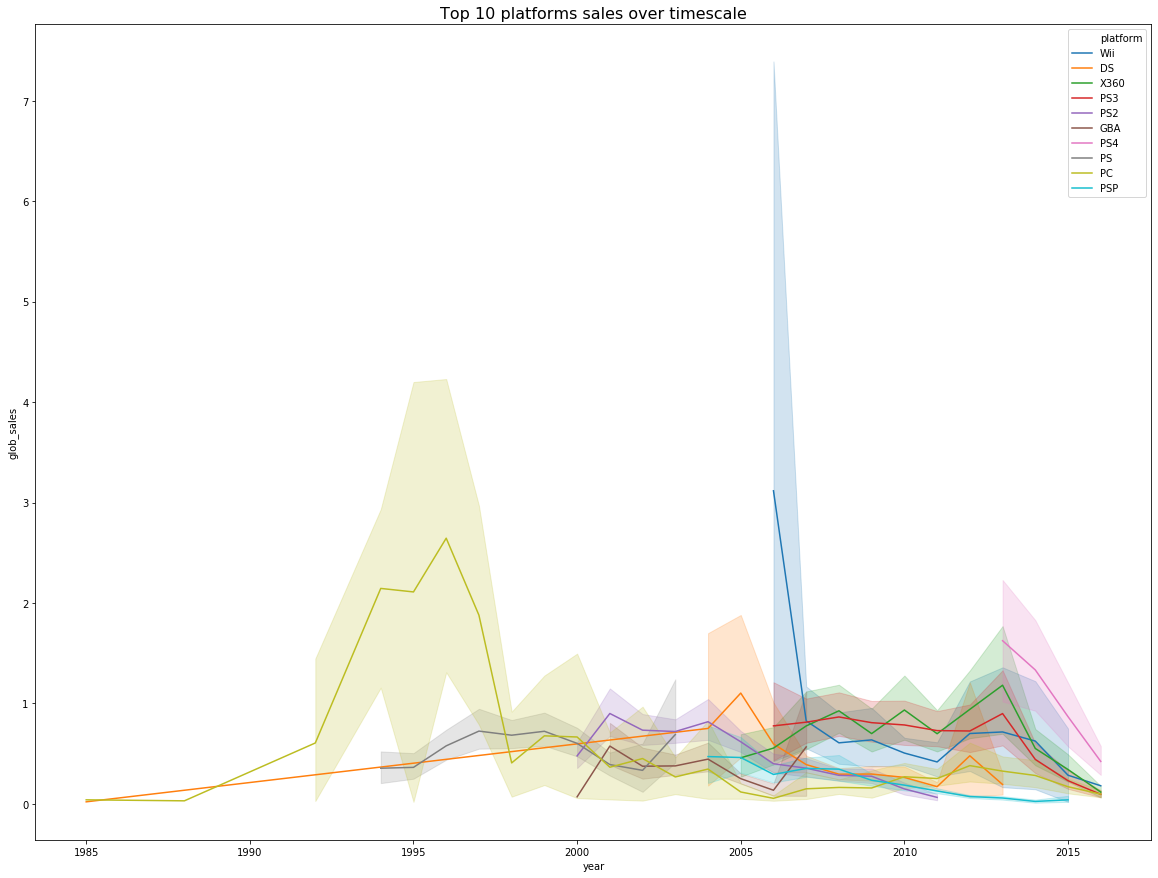

In [46]:
plt.figure(figsize=(20,15))
top10df = games.query('year > 0 & platform == ["PS2", "X360", "PS3", "Wii", "DS", "PS", "GBA", "PS4", "PSP", "PC"]')
plt.title('Top 10 platforms sales over timescale', fontsize=16)
sns.lineplot(data=top10df, x="year", y="glob_sales", hue="platform");

Not really readable, let's zoom in

In [47]:
games['glob_sales'].describe()

count    16711.000000
mean         0.533379
std          1.548364
min          0.010000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: glob_sales, dtype: float64

In [48]:
games['glob_sales'].quantile(0.75) + 1.5*(games['glob_sales'].quantile(0.75) - games['glob_sales'].quantile(0.25))

1.085

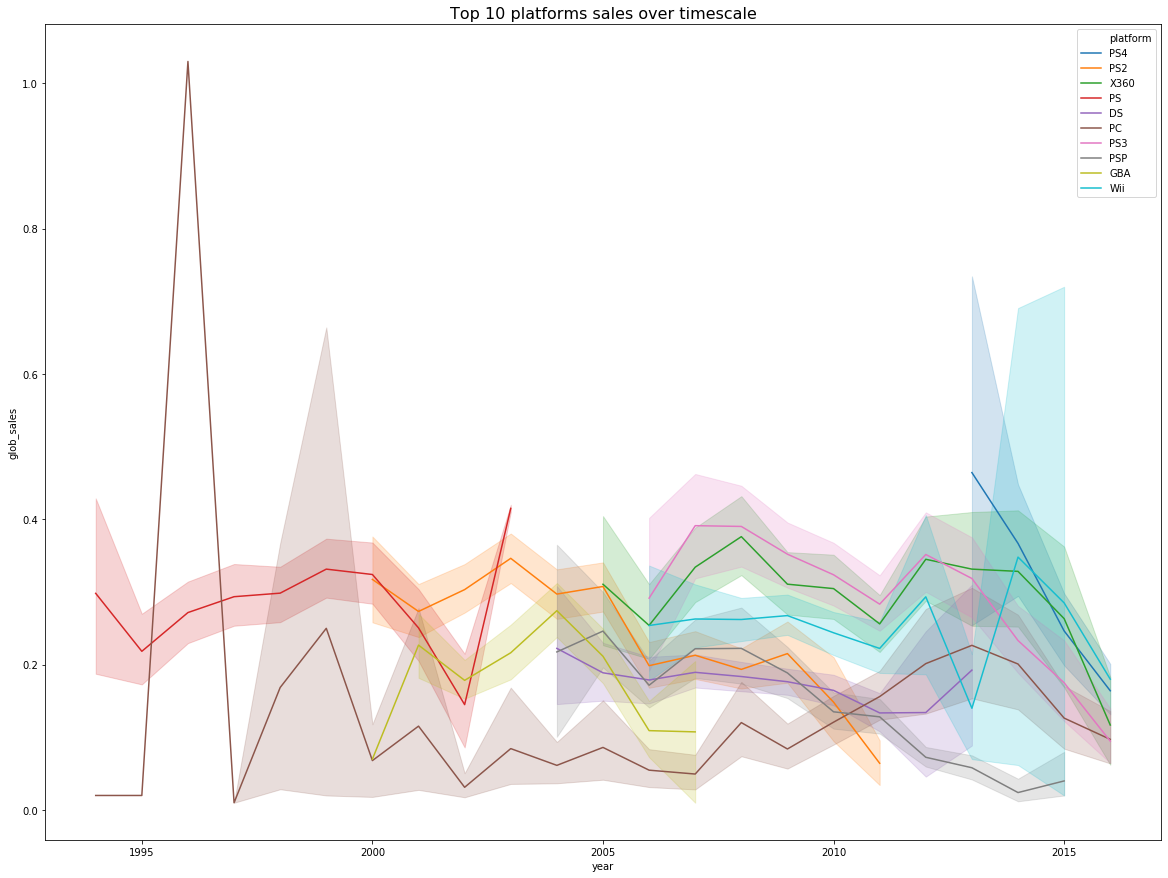

In [49]:
plt.figure(figsize=(20,15))
plt.title('Top 10 platforms sales over timescale', fontsize=16)
sns.lineplot(data=games.query('year > 1993 & glob_sales < 1.085 & platform == ["PS2", "X360", "PS3", "Wii", "DS", "PS", "GBA", "PS4", "PSP", "PC"]'), x="year", y="glob_sales", hue="platform");


No. What a mess!

But I already can make a guess that an average lifespan of a console is less than a decade. 

In [50]:
px.scatter(games.query('year > 1993 & glob_sales < 1.085 & platform == ["PS2", "X360", "PS3", "Wii", "DS", "PS", "GBA", "PS4", "PSP", "PC"]'), #.sort_values(by = 'glob_sales', ascending = False), 
                 x="year", y="glob_sales", 
                 color="platform",
                 title="Top sellers",
                )

Way better

In [51]:
data1 = games.query('year > 1993 & glob_sales < 1.085 & platform == ["PS2", "X360", "PS3", "Wii", "DS", "PS", "GBA", "PS4", "PSP", "PC"]') #.sort_values(by = 'glob_sales', ascending = False)

fig = px.scatter(data1, x="year", y="glob_sales", color="platform", 
                 marginal_x="box", marginal_y="violin",
                 title="Platforms sales over years")
fig.show()

In [52]:
games_f1 = games.query('year > 0 & glob_sales < 1.085')
y_max = pd.pivot_table(games_f1, values=['year'],  index=['platform'], aggfunc = 'min') 
y_min = pd.pivot_table(games_f1, values=['year'],  index=['platform'], aggfunc = 'max')
life = all_data = pd.merge(y_max, y_min, 'left', on = ["platform"] )
life['lifespan'] = life['year_y'] - life['year_x']
life.sort_values(by='lifespan', ascending=False)

year_x  year_y  lifespan
platform                          
PC          1985    2016        31
DS          1985    2013        28
X360        2005    2016        11
GB          1990    2001        11
PSP         2004    2015        11
PS2         2000    2011        11
NES         1984    1994        10
DC          1998    2008        10
Wii         2006    2016        10
PS3         2006    2016        10
2600        1980    1989         9
PS          1994    2003         9
XB          2000    2008         8
SNES        1991    1999         8
GBA         2000    2007         7
N64         1996    2002         6
GC          2001    2007         6
SAT         1994    1999         5
3DS         2011    2016         5
PSV         2011    2016         5
WiiU        2012    2016         4
NG          1993    1996         3
PS4         2013    2016         3
XOne        2013    2016         3
WS          1999    2001         2
GEN         1992    1994         2
3DO         1994    1995         1
SCD         1994    1994         0
TG16        1995    1995         0
GG          1992    1992         0
PCFX        1996    1996         0

In [53]:
life['lifespan'].median()

6.0

In [54]:
life.query('platform == ["PS2", "X360", "PS3", "Wii", "DS", "PS", "GBA", "PS4", "PSP", "PC"]')['lifespan'].median()

10.5

So, average platform lifespan is 6 years

Average lifespan of best selling platform is ~10 years. But it's because those longer living are, obviously sold more over time, even with lower density of sales.

PC is a cheerful veteran, not exactly a gaming platform. Still lively one, though not on it's rise, but I believe it'll stay here for a long more. 
<br>Wii born at 2006, top seller in 2007 and almost dead by 2016.  
<br>GBA from 2000, peaked at 2003, died at 2007
<br>PSP 2000-2009-2015
<br>PS3 is still with us, since 2006
<br>DS 2004-2008-2013
<br>PS 1994-1998-2003
<br>X360 is here yet, begun at 2005, peaked at 2010
<br>PS2 started at 2000, peaked at 2005, and passed away in 2011
<br>PS4 is on it's very rise! Timid start in 2013, steady growth to 2015, slight shrink by now, probably reflecting general market's trend

This graph is far better. I can turn platforms on and off on the graph by clicking on their names on the legend list, that's super convenient.

I can see that an overage platform lifespan is less than a decade. actually even less, as I calculated.
some platforms like pc are just not exactly

Market is shrinking.

###### 3.3 Determine what period you should take data for

Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.
<code style="background:yellow;color:black">Work only with the data that you've decided is relevant. Disregard the data for previous years, the task states. so I'm slicing it out.

So, platforms generation usual pace is close to 6 yrs, but bestselling platforms are, obviously, longer living ones. Let me take ~10 yrs period for consideration, it's December 2016 now, so, let's slice from 2007. Even though there is some trend of platforms average lifespan shortening over time, I think this is the correct part of the set.

In [55]:
games_filtred = games.query('year > 2007')

In [56]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out
#what a nice function

In [57]:
games_filtred2 = remove_outlier(games_filtred, 'glob_sales')
games_filtred2 = remove_outlier(games_filtred, 'na_sales')
games_filtred2 = remove_outlier(games_filtred, 'eu_sales')
games_filtred2 = remove_outlier(games_filtred, 'jp_sales')
games_filtred2 = remove_outlier(games_filtred, 'oth_sales')
games_filtred2 = remove_outlier(games_filtred, 'critic_scr')
games_filtred2 = remove_outlier(games_filtred, 'glob_sales')
games_filtred2 = remove_outlier(games_filtred, 'glob_sales')

clipping some upper Q3+1.5IQR

In [58]:
games_filtred2.sample()

name platform  year   genre  na_sales  eu_sales  \
4041  Dreamworks Madagascar Kartz      Wii  2009  Racing      0.29      0.15   

      jp_sales  oth_sales  critic_scr user_scr rating  glob_sales  
4041       0.0       0.05         NaN      tbd      E        0.49

In [59]:
games_rated_proper = games_filtred2.copy()
games_rated_proper['user_scr'] = games_rated_proper['user_scr'].replace("tbd", -999)
games_rated_proper['user_scr'] = games_rated_proper['user_scr'].fillna(-999).astype(float)
games_rated_proper['critic_scr'] = games_rated_proper['critic_scr'].fillna(-999)

So, now it's easier to slice out missings here

###### 3.4 Leading platforms

Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.

In [60]:
data1 = games_filtred2.query('year > 1993 & glob_sales < 1.085 & platform == ["PS4", "XOne"]')

fig = px.scatter(data1, x="year", y="glob_sales", color="platform", 
                 marginal_x="box", marginal_y="violin",
                 title="Currentltly trending")
fig.show()

Let's take a look at the whole range of the platforms. XOne and PS4 seem to be on their rise. XOne has modest sales, not even in top 10, but it's not yet a history. However, most platforms BUT XOne and PS4 are shrinking in sales! PC, WiiU, PSV are much worse, but still alive.

In [61]:
data2 = games_filtred2.query('year > 1993 & glob_sales < 1.085 & platform == ["PC", "WiiU", "PSV"]')

fig = px.scatter(data2, x="year", y="glob_sales", color="platform", 
                 marginal_x="box", marginal_y="violin",
                 title="Platforms sales over years")
fig.show()

###### 3.5 Sales by platform

Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

In [62]:
plt.figure(figsize=(15, 5))
sns.boxplot( x=games_filtred2['platform'], y=games_filtred2['glob_sales']);

Differences in sales are significant. Averages also differ up to 9 times for some 

In [63]:
pd.pivot_table(games_filtred2, values='glob_sales', index='platform', aggfunc='median').sort_values(by='glob_sales', ascending = False)

glob_sales
platform            
X360           0.200
PS3            0.190
XB             0.180
Wii            0.160
WiiU           0.150
XOne           0.140
PS2            0.130
PS4            0.110
3DS            0.105
DS             0.100
PSP            0.060
PC             0.050
PSV            0.050
DC             0.040

Global sales averages

XOne's the most promising choice in terms of dynamics as of 2016. But top yield for the decade belongs to older entries. X360, PS3, XB, Wii, WiiU are decade's top 5 in terms of summary sales.

###### 3.6 Reviews

Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

Let's see Wii sales vs rating correlation, feels like it's a good choice, Wii's lifespan looks like almost over, but not a fossil yet 

In [64]:
plt.figure(figsize=(10,8))
g=sns.heatmap(games_rated_proper.query('user_scr > 0 & critic_scr >0 & platform == "Wii"').corr(), annot=True)
plt.show() 

User scores are somewhat correlated w critics scores. Not sure if they just share opinions and critics are amongst users, or it's more of critic's influence over user's opinions. No significant correlations between scores and sales here.

Let's check couple of other platforms

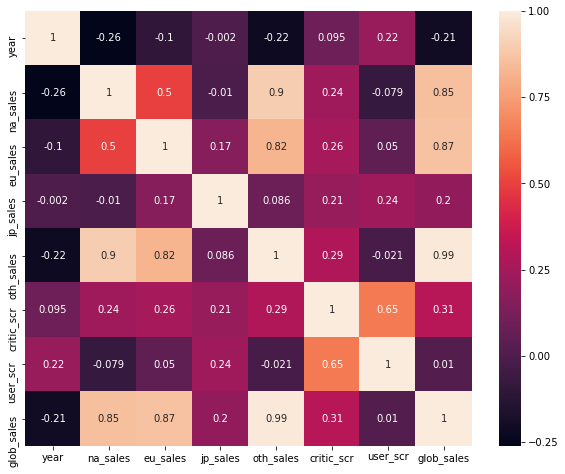

In [65]:
plt.figure(figsize=(10,8))
g=sns.heatmap(games_rated_proper.query('user_scr > 0 & critic_scr >0 & platform == "PS4"').corr(), annot=True)
plt.show() 

Knowing how vigorously some companies in different industries are fighting for reviews it is so surprising to see a lack of correlation here

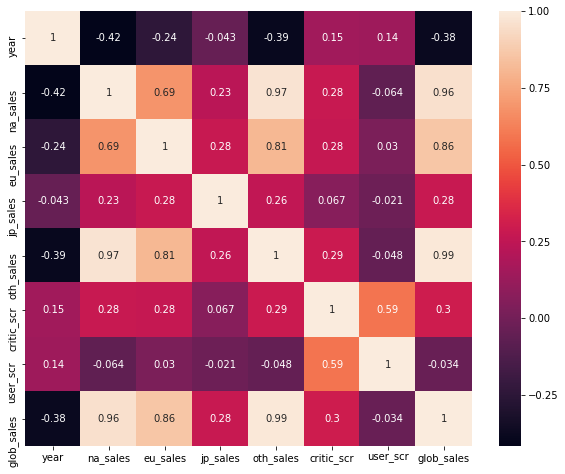

In [66]:
plt.figure(figsize=(10,8))
g=sns.heatmap(games_rated_proper.query('user_scr > 0 & critic_scr >0 & platform == "XOne"').corr(), annot=True)
plt.show() 

Wow! Negatively directed relation between user's score and sales! Weakest one, but the direction is still impressive.

In [67]:
fig = px.scatter(games_rated_proper.query('user_scr > 0 & critic_scr >0'), x="user_scr", y="critic_scr", color="platform", 
                 title="Critic's vs user's scores correlation")
fig.show()

Om the graph the correlation feels much stronger to me

Surprisingly, there is NO significant correlations between reviews and sales, for both users and critics reviews. The market is, probably, shaped by different means.

###### 3.7 Sales comparison for games across platforms

In [68]:
games_filtred2.sample()

name platform  year genre  na_sales  eu_sales  \
12443  ZhuZhu Pets: Quest for Zhu       DS  2011  Misc      0.06       0.0   

       jp_sales  oth_sales  critic_scr user_scr rating  glob_sales  
12443       0.0        0.0         NaN      tbd    NaN        0.06

In [69]:
top_games = pd.pivot_table(games_filtred2, values=['glob_sales', 'na_sales', 'eu_sales', 'jp_sales', 'oth_sales'],  index=['name'], aggfunc = 'sum').sort_values(by = 'glob_sales', ascending = False)
top_games.head(10)

eu_sales  glob_sales  jp_sales  \
name                                                                     
LEGO Jurassic World                         1.91        4.69      0.07   
Skylanders: Trap Team                       1.64        4.30      0.00   
Lego Batman 3: Beyond Gotham                1.84        4.26      0.00   
The LEGO Movie Videogame                    1.64        3.82      0.11   
WWE SmackDown vs. Raw 2009                  1.09        3.61      0.01   
Iron Man                                    0.92        3.54      0.00   
Avatar: The Game                            1.55        3.43      0.00   
Ghostbusters: The Video Game                0.87        3.35      0.00   
Harry Potter and the Half-Blood Prince      1.26        3.16      0.00   
Minecraft: Story Mode                       1.24        2.92      0.00   

                                        na_sales  oth_sales  
name                                                         
LEGO Jurassic World                         2.15       0.56  
Skylanders: Trap Team                       2.20       0.46  
Lego Batman 3: Beyond Gotham                1.88       0.54  
The LEGO Movie Videogame                    1.59       0.48  
WWE SmackDown vs. Raw 2009                  2.08       0.43  
Iron Man                                    2.06       0.56  
Avatar: The Game                            1.38       0.50  
Ghostbusters: The Video Game                1.91       0.57  
Harry Potter and the Half-Blood Prince      1.11       0.79  
Minecraft: Story Mode                       1.32       0.36

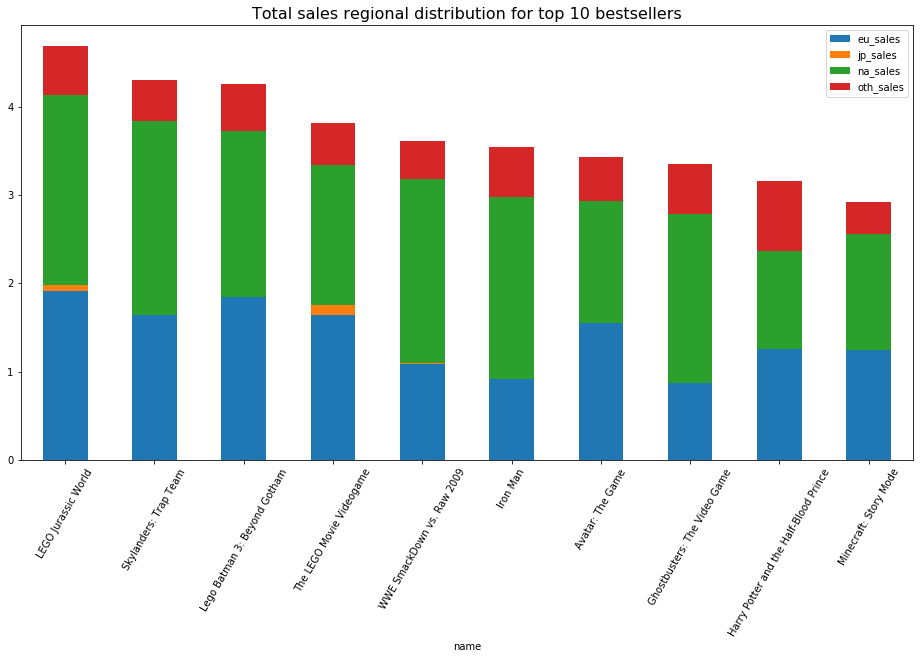

In [70]:
top_games.head(10).drop('glob_sales', axis=1).plot.bar(stacked=True, rot=60, figsize=(16,8))
plt.title("Total sales regional distribution for top 10 bestsellers", fontsize = 16);

Hmm, top sellers seem not to be so much skewed towards the NA market, which is responsible for half of total sales. 

In [71]:
top_games_list = ['LEGO Jurassic World', 'Skylanders: Trap Team', 'Lego Batman 3: Beyond Gotham', 'The LEGO Movie Videogame', 
                  "WWE SmackDown vs. Raw 2009", 'Iron Man', 'Avatar: The Game', 'Ghostbusters: The Video Game', 
                  'Harry Potter and the Half-Blood Prince', 'Minecraft: Story Mode']

In [72]:
games_over_platforms = pd.pivot_table(games_filtred2.query('name == @top_games_list'), values=['glob_sales', 'na_sales', 'eu_sales', 'jp_sales', 'oth_sales'],  index=['name', 'platform'], aggfunc = 'sum') #.sort_values(by = 'glob_sales', ascending = False)
games_over_platforms

eu_sales  glob_sales  jp_sales  na_sales  \
name                       platform                                             
Avatar: The Game           DS            0.18        0.40      0.00      0.18   
                           PC            0.04        0.05      0.00      0.00   
                           PS3           0.42        0.90      0.00      0.32   
                           PSP           0.24        0.60      0.00      0.22   
                           Wii           0.32        0.71      0.00      0.32   
...                                       ...         ...       ...       ...   
WWE SmackDown vs. Raw 2009 DS            0.02        0.17      0.00      0.14   
                           PS3           0.30        0.94      0.01      0.51   
                           PSP           0.20        0.75      0.00      0.41   
                           Wii           0.31        0.83      0.00      0.44   
                           X360          0.26        0.92      0.00      0.58   

                                     oth_sales  
name                       platform             
Avatar: The Game           DS             0.04  
                           PC             0.01  
                           PS3            0.16  
                           PSP            0.14  
                           Wii            0.07  
...                                        ...  
WWE SmackDown vs. Raw 2009 DS             0.01  
                           PS3            0.12  
                           PSP            0.14  
                           Wii            0.08  
                           X360           0.08  

[65 rows x 5 columns]

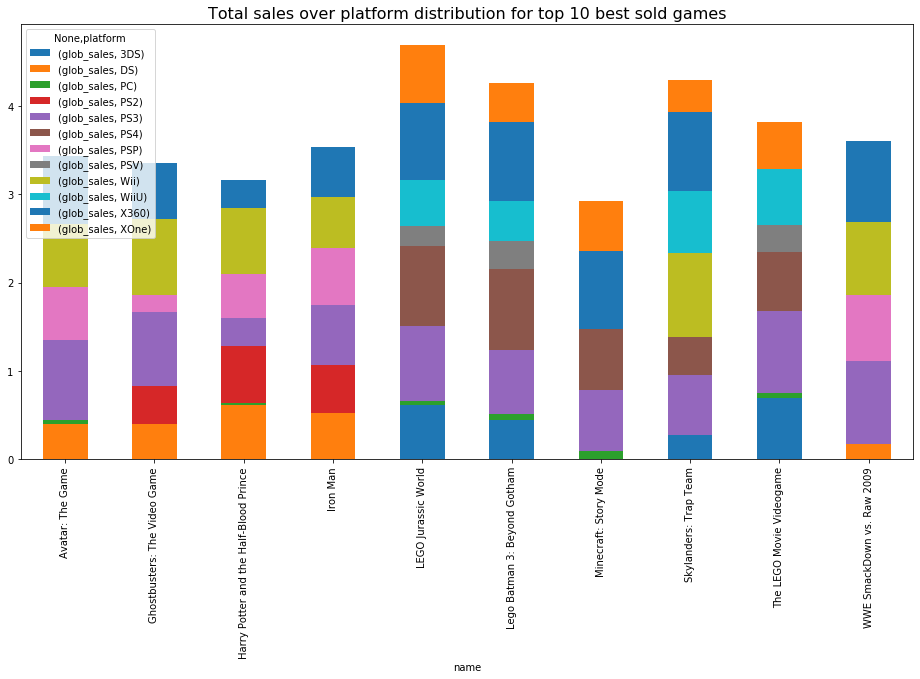

In [73]:
data_top10 = games_over_platforms.drop(['eu_sales', 'jp_sales', 'na_sales', 'oth_sales'], axis=1)
data_top10.unstack().plot(kind='bar', stacked=True, figsize=(16,8));
plt.title("Total sales over platform distribution for top 10 best sold games", fontsize = 16);

So, PS4 (especially great for a freshly emerging one), 3DS, Wii, PS3, PSP, WiiU are among the most presented in top sold games

###### 3.8 Genres profitability 

Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

In [74]:
plt.figure(figsize=(15, 5))
sns.boxplot( x=games_filtred2['genre'], y=games_filtred2['glob_sales']);

No wonder shooters are top sellers, I personally never found it entertaining to play sports video games, but they share second place with platform games, which are more of a heritage, but probably that's the main reason of their popularity. though median for 9 top out of 12 genres looks not so different. So-called adventure genre is the least sold, not all people actually enjoy solving it, it's the least dynamic genre, along with puzzle, which is, for whatever reason, a little more popular. Strategy games are more engaging and have better sales, but still noticeably lower than most of other genres. 

### Step 4. Create a user profile for each region

For each region (NA, EU, JP), determine:
The top five platforms. Describe variations in their market shares from region to region.
The top five genres. Explain the difference.
Do ESRB ratings affect sales in individual regions?

###### 4.1 The top five platforms

The top five platforms. Describe variations in their market shares from region to region.

In [75]:
pivot10.head()

glob_sales
platform            
PS2          1255.77
X360          971.42
PS3           939.65
Wii           907.51
DS            806.12

In [76]:
sales_by_platforms = pd.pivot_table(games_filtred2.drop(['critic_scr', 'year'], axis = 1), index=['platform'], aggfunc = 'sum').sort_values(by = 'glob_sales', ascending = False)
sales_by_platforms

eu_sales  glob_sales  jp_sales  na_sales  oth_sales
platform                                                     
PS3          80.18      270.99     42.19    114.52      34.10
Wii          51.80      224.88     14.34    141.19      17.55
X360         66.90      221.90      4.76    130.77      19.47
DS           37.34      214.10     35.29    126.97      14.50
PSP          14.89       98.48     48.14     26.19       9.26
3DS          17.52       84.82     36.65     26.69       3.96
PC           53.83       82.15      0.00     19.14       9.18
PS4          27.25       68.58      8.23     23.27       9.83
PS2          11.49       58.27      8.03     22.50      16.25
XOne         14.86       44.42      0.07     25.59       3.90
PSV           9.57       44.15     20.27      9.48       4.83
WiiU         10.43       30.73      3.35     14.62       2.33
XB            0.04        0.18      0.00      0.13       0.01
DC            0.00        0.04      0.04      0.00       0.00

In [77]:
sales_by_platforms.head(5).plot.bar(stacked=True,rot=85, figsize=(16,8))
plt.title("Top 5 platforms globally", fontsize = 16);

So, North America is ahead, making about a half of the market. Let's see it without global values

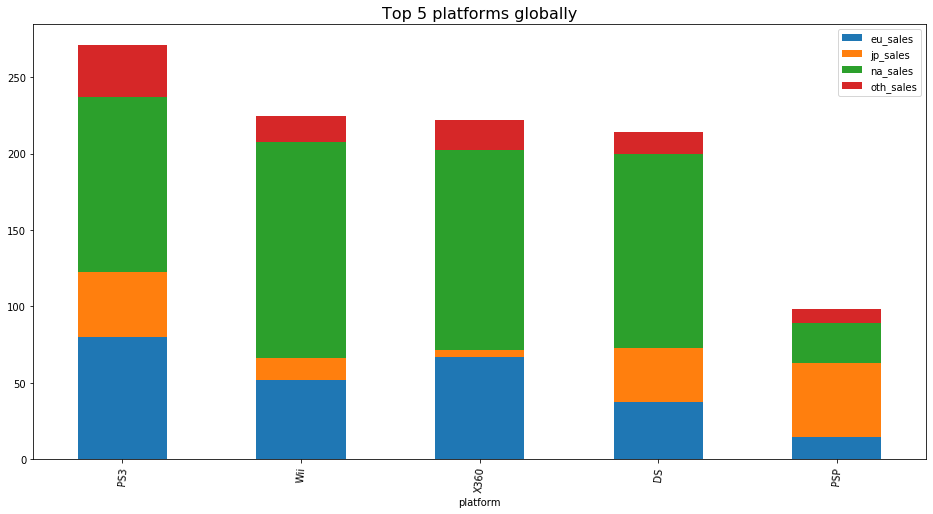

In [78]:
sales_by_platforms.head(5).drop('glob_sales', axis=1).plot.bar(stacked=True,rot=85, figsize=(16,8))
plt.title("Top 5 platforms globally", fontsize = 16);

So, of global top sellers, EU buyers prefer PS3 the most, somewhat less X360, significantly less Wii, DS, and PSP the least of top 5.
NA gamers like Wii better, and just slightly less X360 and DS, PS3 slightly less, and PSP the least.
Japanese audience go for PSP first, PS3 and DS much less, Wii and X360 least.

Most of top selling platforms market located in North Americas

Would also like to see a geographical distribution

In [79]:
games_filtred2.drop(['name', 'platform', 'year', 'genre', 'critic_scr', 'user_scr', 'rating'], axis = 1).describe()

na_sales     eu_sales     jp_sales    oth_sales   glob_sales
count  7231.000000  7231.000000  7231.000000  7231.000000  7231.000000
mean      0.094186     0.054778     0.030613     0.020076     0.199653
std       0.128912     0.094864     0.074032     0.035016     0.216595
min       0.000000     0.000000     0.000000     0.000000     0.010000
25%       0.000000     0.000000     0.000000     0.000000     0.040000
50%       0.050000     0.010000     0.000000     0.010000     0.110000
75%       0.140000     0.070000     0.030000     0.020000     0.280000
max       0.870000     0.830000     0.930000     0.570000     0.950000

In [80]:
print ('\n', 'North America total sales:', games['na_sales'].sum().astype(int), '\n' ,'European Union total sales:', games['eu_sales'].sum().astype(int), '\n', 'Japan total sales:', games['jp_sales'].sum().astype(int), '\n', 'Other total sales:', games['oth_sales'].sum().astype(int), '\n', 'Total sales:', games['glob_sales'].sum().astype(int))


 North America total sales: 4400 
 European Union total sales: 2424 
 Japan total sales: 1297 
 Other total sales: 791 
 Total sales: 8913


In [81]:
print ('\n', 'North America total sales:', games_filtred2['na_sales'].sum().astype(int), '\n' ,'European Union total sales:', games_filtred2['eu_sales'].sum().astype(int), '\n', 'Japan total sales:', games_filtred2['jp_sales'].sum().astype(int), '\n', 'Other total sales:', games_filtred2['oth_sales'].sum().astype(int), '\n', 'Total sales:', games_filtred2['glob_sales'].sum().astype(int))


 North America total sales: 681 
 European Union total sales: 396 
 Japan total sales: 221 
 Other total sales: 145 
 Total sales: 1443


North America's share equals to almost half of globe's. EU's share nearing quarter. Japanese is just third here, significantly behind the two titans, but it is actually one of global top markets.  


In [82]:
top5_na = pd.pivot_table(games_filtred2, values=['na_sales'],  index=['platform'], aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False)
top5_na.head()

na_sales
platform          
Wii         141.19
X360        130.77
DS          126.97
PS3         114.52
3DS          26.69

In [83]:
top5_jp = pd.pivot_table(games_filtred2, values=['jp_sales'],  index=['platform'], aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False)
top5_jp.head()

jp_sales
platform          
PSP          48.14
PS3          42.19
3DS          36.65
DS           35.29
PSV          20.27

In [84]:
top5_eu = pd.pivot_table(games_filtred2, values=['eu_sales'],  index=['platform'], aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False)
top5_eu.head()

eu_sales
platform          
PS3          80.18
X360         66.90
PC           53.83
Wii          51.80
DS           37.34

So here's regional distribution by top platforms. Japanese market is pretty specific.

In [85]:
from functools import reduce

In [86]:
df5 = [top5_na.head(), top5_eu.head(), top5_jp.head()]
top5_platforms_shares = reduce(lambda left,right: pd.merge(left,right,on=['platform'],
                                            how='outer'), df5).fillna(0)

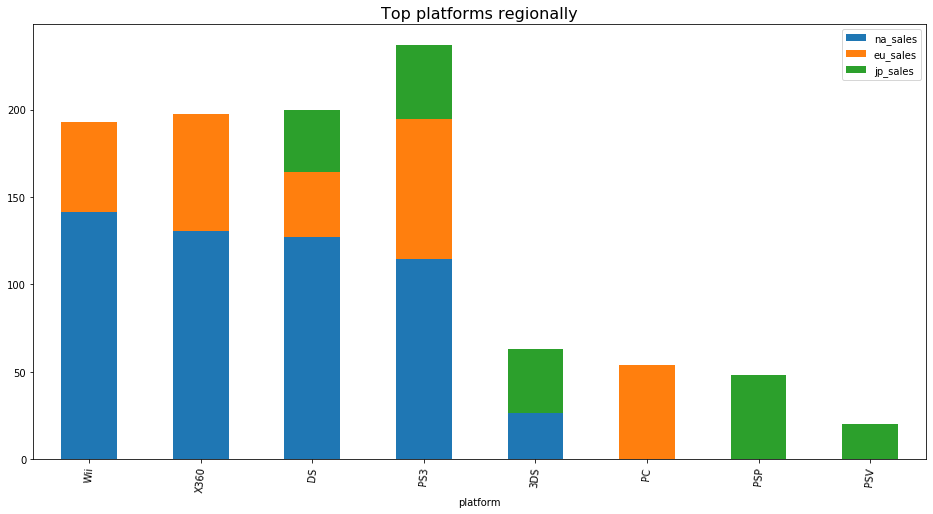

In [87]:
top5_platforms_shares.plot.bar(stacked=True,rot=85, figsize=(16,8))
plt.title("Top platforms regionally", fontsize = 16);

Regional leaders on comparison graph. Again, here it's so obvious that Japanese market is very specific, isolated in a way. PC is solemnly European platform, actually the longest living one, and nothing like dead. I think, PC still have a bright prospects as a gaming platform, though it's incapable of beating newer champions. American market is the definitive one though all three are very important on global scale.


###### 4.2 The top five genres

The top five genres. Explain the difference. 

In [88]:
sales_by_genres = pd.pivot_table(games_filtred2.drop(['critic_scr', 'year'], axis = 1), index=['genre'], aggfunc = 'sum').sort_values(by = 'glob_sales', ascending = False)
sales_by_genres

eu_sales  glob_sales  jp_sales  na_sales  oth_sales
genre                                                            
Action          109.63      373.06     57.84    166.54      39.05
Sports           52.00      206.37     17.54    115.26      21.57
Misc             45.20      186.84     23.75     98.54      19.35
Role-Playing     24.91      143.04     58.49     49.83       9.81
Shooter          45.57      122.53      4.18     57.91      14.87
Adventure        20.25       79.30     22.45     30.55       6.05
Simulation       17.12       76.04      6.90     45.36       6.66
Racing           29.87       74.93      0.92     34.51       9.63
Fighting         14.26       63.45     14.08     28.80       6.31
Platform         14.24       44.00      1.65     22.11       6.00
Strategy         13.51       40.35     10.02     13.55       3.27
Puzzle            9.54       33.78      3.54     18.10       2.60

Top five are Action, the very first by far, Sports, Shooter, RPG, Platform.
Guess platformers are more of a heritage.

In [89]:
sales_by_genres.drop(['glob_sales', 'oth_sales'], axis=1).plot.bar(stacked=True,rot=85, figsize=(16,8))
plt.title("Top genres regionally", fontsize = 16);

Distribution is uneven, though Action games are by far the most popular everywhere, but in Japan, where RPG are near. Sports Are second popular in EU and NA.

###### 4.3 ESRB ratings

ESRB Ratings
<p>
    <br>EC - Early Childhood Content intended for young children and may be suitable for ages 3 and older. Contains no material that parents would find inappropriate.
<p>

<br>E10+ - Content that is generally suitable for persons ages 10 and up.
<p>
                <br>E - Everyone have content that may be suitable for persons ages 6 and older. Titles in this category may contain minimal violence, some comic mischief and/or mild language.
<p>
                <br>T - Teen have content that may be suitable for persons ages 13 and older. May contain violent content, mild or strong language, and/or suggestive themes.
<p>
                <br>M - Mature have content that may be suitable for persons ages 17 and older. Titles in this category may contain mature sexual themes, more intense violence and/or strong language.
<p>
                <br>AO - Adults Only have content suitable only for adults. Titles in this category may include graphic depictions of sex and/or violence. Adult Only products are not intended for persons under the age of 18.
<p>
                <br>RP - Rating Pending have been submitted to the ESRB and are awaiting final rating. Usually seen in advertising and promotional materials prior to an official release of the game.

Do ESRB ratings affect sales in individual regions?

In [90]:
games_pp2 = games_filtred2[games_filtred2['rating'].isnull() == False].loc[:,["rating", "jp_sales", "na_sales", "eu_sales", "oth_sales", "glob_sales"]]
games_pp2

rating  jp_sales  na_sales  eu_sales  oth_sales  glob_sales
2155       E      0.34      0.26      0.29       0.05        0.94
2168       E      0.51      0.03      0.41       0.00        0.95
2171       M      0.09      0.41      0.32       0.12        0.94
2173       T      0.01      0.24      0.52       0.18        0.95
2177       M      0.00      0.62      0.24       0.09        0.95
...      ...       ...       ...       ...        ...         ...
16692      M      0.00      0.00      0.01       0.00        0.01
16696      T      0.00      0.01      0.00       0.00        0.01
16698      E      0.00      0.01      0.00       0.00        0.01
16702   E10+      0.00      0.00      0.01       0.00        0.01
16704      E      0.00      0.01      0.00       0.00        0.01

[4318 rows x 6 columns]

In [91]:
sales_by_rating = pd.pivot_table(games_filtred2.drop(['critic_scr', 'year'], axis=1), index=['rating'], aggfunc = 'sum') #.sort_values(by = 'glob_sales', ascending = False)
sales_by_rating

eu_sales  glob_sales  jp_sales  na_sales  oth_sales
rating                                                     
E          90.44      365.73     12.39    225.34      37.56
E10+       62.99      220.18      8.92    122.85      25.42
EC          0.00        1.40      0.00      1.32       0.08
M          75.47      201.85     14.69     88.84      22.85
RP          0.03        0.04      0.00      0.00       0.01
T          81.95      294.76     38.78    141.86      32.17

I better look at total sum per rating category, because otherwise I won't see Japan, whose median sales equals to zero, since most of it's values are zero. Japanese market is second largest in the world, but it is somewhat specific. 

Let's take a closer look at regional sales

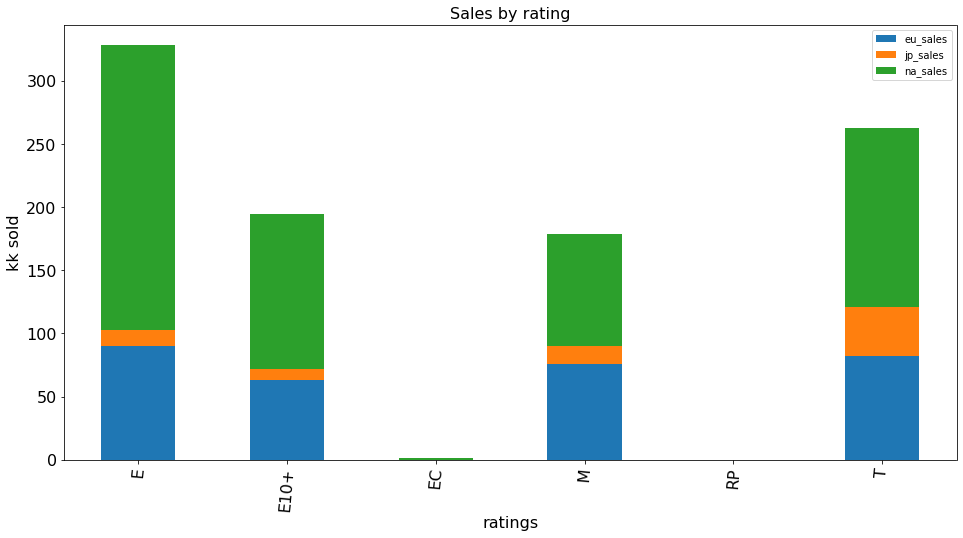

In [92]:
sales_by_rating.drop(['glob_sales', 'oth_sales'], axis = 1).plot.bar(stacked=True,rot=85, fontsize = 16, figsize=(16,8))
plt.ylabel("kk sold", fontsize = 16) 
plt.xlabel("ratings", fontsize = 16) 
plt.title("Sales by rating", fontsize = 16);

So, E (6+) years are the most sold in EU and NA. T (13+) is top seller in Japan. Looks like EC (3+) is American feature. M (17+) and E10+ are slightly more sold in the US. Maybe these might be partly affected by some local legislation. 

##### 4.4 Conclusion

Regional profiles

<br>North America
<br>Wii, X360, DS, PS3, 3DS 
<br>Action, sports, misc, Shooter, RPG
<br>E, T, E10+, M, EC

<br>European Union 
<br>PS3, X360, PC, Wii, DS
<br>Action, sports, shooter, misc, racing
<br>E, T, M, E10+

<br>Japan
<br>PSP , PS3, 3DS, DS, PSV
<br>RPG, shooter, misc, adventure, sports
<br>T, M, E, E10+

### Step 5. Hypotheses testing

—Average user ratings of the Xbox One and PC platforms are the same.

—Average user ratings for the Action and Sports genres are different.
Set the alpha threshold value yourself.

Explain:

—How you formulated the null and alternative hypotheses

—What significance level you chose to test the hypotheses, and why

###### 5.1 Average user ratings of the Xbox One and PC platforms are the same

Null hypothesis: Average user ratings of the Xbox One and PC platforms are the same
<p>Alt hypothesis: Average user ratings of the Xbox One and PC platforms are NOT the same

Since ttest checks if medians are similar, null hypo is that values are same

In [93]:
games_rated_proper2 = games_rated_proper.query('user_scr >= 0')

Cutting missing values marked by -999

In [94]:
games_rated_proper2['platform'].unique()

array(['3DS', 'PS3', 'X360', 'PSP', 'Wii', 'PS4', 'XOne', 'DS', 'PC',
       'PS2', 'WiiU', 'PSV', 'XB'], dtype=object)

In [95]:
len(games_rated_proper2.query('platform == "XOne"'))

134

In [96]:
games_rated_proper2.query('platform == "XOne"')['user_scr'].var()

2.0568763326226014

In [97]:
len(games_rated_proper2.query('platform == "PC"'))

482

In [98]:
games_rated_proper2.query('platform == "PC"')['user_scr'].var()

2.3117224661623

In [99]:
from scipy import stats as st
import numpy as np

alpha = 0.05

results = st.ttest_ind(
        games_rated_proper2.query('platform == "XOne"')['user_scr'], 
        games_rated_proper2.query('platform == "PC"')['user_scr'],
        equal_var = False
        ) 

print('p-value:', results.pvalue) 

if results.pvalue < alpha:
    print("reject the null hypothesis")
else:
    print("can't reject the null hypothesis")

p-value: 0.1669909972043312
can't reject the null hypothesis


OK. Tested values are close with likelihood high enough, so that the null hypothesis can't be rejected.

###### 5.2 Average user ratings for the Action and Sports genres are different

Null hypothesis: Average user ratings for the Action and Sports genres are similar
<p>Alt hypothesis: Average user ratings for the Action and Sports genres are different

In [100]:
len(games_rated_proper2.query('genre == "Action"'))

866

In [101]:
games_rated_proper2.query('genre == "Action"')['user_scr'].var()

1.879621140316918

In [102]:
len(games_rated_proper2.query('genre == "Sports"'))

382

In [103]:
games_rated_proper2.query('genre == "Sports"')['user_scr'].var()

3.1188812164186284

In [104]:
alpha =  0.05

results = st.ttest_ind(
       games_rated_proper2.query('genre == "Action"')['user_scr'], 
       games_rated_proper2.query('genre == "Sports"')['user_scr'],
        equal_var = False
        ) 

print('p-value:', results.pvalue) 

if (results.pvalue < alpha):
    print("reject the null hypothesis")
else:
    print("can't reject the null hypothesis")

p-value: 3.0870788626006723e-09
reject the null hypothesis


Yes, sure, because these values differ, as shown in above sections. Though not too much.

###### 5.3 Conclusion 

Explain: 

—How you formulated the null and alternative hypotheses 

—What significance level you chose to test the hypotheses, and why

I used a statements of equality of two sets of values for null hypotheses, since ttest_ind method shows probability of their medians equality. Alternative hypothesis is inequality of a given sets.

I took 0.05 as significance level. Guess 5% of probability of mistake is not such a big deal, at least from what I read I know, that 0.05 is a golden standard.

### Step 6. General conclusion

The top seller game profile is: North American - EU marketed cross-platform action game. 
<br>I guess, both gamers and game publishers prefer consoles that have a large market share, it's like cumulative effect.  <br>Successful games are cross-platform, single-platformed games are loosing potential revenues that these games might have generated from other platforms, obviously. North America market is the key
<br>Surprisingly, there is NO significant correlations between reviews and sales, for both users and critics reviews. The market is, likely, shaped by different means.
<br>XOne and PS4 seem to be on their rise. PS4 is amongst best selling platforms from it's launch. XOne has modest sales, not even in top 10, but it's not yet a history and steadily growing. However, most platforms BUT XOne and PS4 are shrinking in sales! PC, WiiU, PSV are much less profitable, but still alive. PS4 and XOne are the most promising choices in terms of dynamics as of 2016. But top yield for the decade belongs to older entries: X360, PS3, XB, Wii, WiiU are decade's top 5 in terms of summary sales. 
<br>PS4 (especially great for a freshly emerging one), 3DS, Wii, PS3, PSP, WiiU are among the most presented in top sold games
<br>No wonder actions and shooters are top sellers, I personally never found it entertaining to play sports video games, but they share second place with platform games, which are more of a heritage, but probably that's the main reason of their popularity. 
<br>Median for 9 top out of 12 genres looks not so different. So-called adventure genre is the least sold, not all people actually enjoy solving it, it's the least dynamic genre, along with puzzle, which is, for whatever reason, a little more popular. Strategy games are more engaging and have better sales, but still noticeably lower than most of other genres. 
<br>North America's share equals to almost half of globe's. EU's share nearing quarter. Japanese is just third here, significantly behind the two titans, but it is actually one of global top markets. 
<br>Japanese market is very specific, isolated in a way. PC is solemnly European platform, actually the longest living one, and nothing like dead. I think, PC still have a bright prospects as a gaming platform, though it's incapable of beating newer champions. American market is the definitive one though all three are very important on global scale.    